In [5]:
!apt install gdal-bin python3-gdal -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  gdal-data libaec0 libarmadillo10 libarpack2 libblosc1 libcfitsio9 libcharls2
  libde265-0 libfreexl1 libfyba0 libgdal30 libgeos-c1v5 libgeos3.10.2
  libgeotiff5 libgif7 libhdf4-0-alt libhdf5-103-1 libhdf5-hl-100 libheif1
  libkmlbase1 libkmldom1 libkmlengine1 liblcms2-2 libltdl7 libminizip1
  libmysqlclient21 libnetcdf19 libnspr4 libnss3 libodbc2 libodbcinst2
  libogdi4.1 libpoppler118 libpq5 libproj22 libqhull-r8.0 librttopo1
  libspatialite7 libsuperlu5 libsz2 liburiparser1 libxerces-c3.2 mysql-common
  poppler-data proj-bin proj-data python3-numpy unixodbc-common
Suggested packages:
  libgdal-grass geotiff-bin libgeotiff-epsg libhdf4-doc libhdf4-alt-dev
  hdf4-tools liblcms2-utils odbc-postgresql tdsodbc ogdi-bin poppler-utils
  ghostscript fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-gothic fo

In [3]:
from osgeo import gdal, gdalconst
print(gdal.__version__)

3.4.1


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os

Смотрим входные данные

In [5]:
os.listdir('1_20')

['crop_2_1_0000.tif',
 'crop_1_1_0000.tif',
 'crop_0_0_0000.tif',
 'crop_4_0_0000.tif',
 'crop_1_3_0000.tif',
 'crop_1_0_0000.tif',
 'crop_0_3_0000.tif',
 'crop_2_0_0000.tif',
 'crop_3_2_0000.tif',
 'crop_2_2_0000.tif',
 'crop_1_2_0000.tif',
 'crop_4_2_0000.tif',
 'crop_3_3_0000.tif',
 'crop_3_0_0000.tif',
 'crop_3_1_0000.tif',
 'crop_4_3_0000.tif',
 'crop_4_1_0000.tif',
 'crop_0_2_0000.tif',
 'crop_0_1_0000.tif',
 'crop_2_3_0000.tif']

In [6]:
os.listdir('layouts')

['layout_2022-03-17.tif',
 'layout_2021-06-15.tif',
 'layout_2021-08-16.tif',
 'layout_2021-10-10.tif']

Смотрим что на тех снимках, для которых нужно восстановить геопривязку


На первом, к примеру

In [7]:
ds = gdal.Open('1_20/crop_2_1_0000.tif', gdal.GA_ReadOnly)
print("Количество растров: ", ds.RasterCount)
print("Количество геопривязок: ", ds.GetGCPCount())
print("Количество слоев: ",ds.GetLayerCount())

Количество растров:  4
Количество геопривязок:  0
Количество слоев:  0


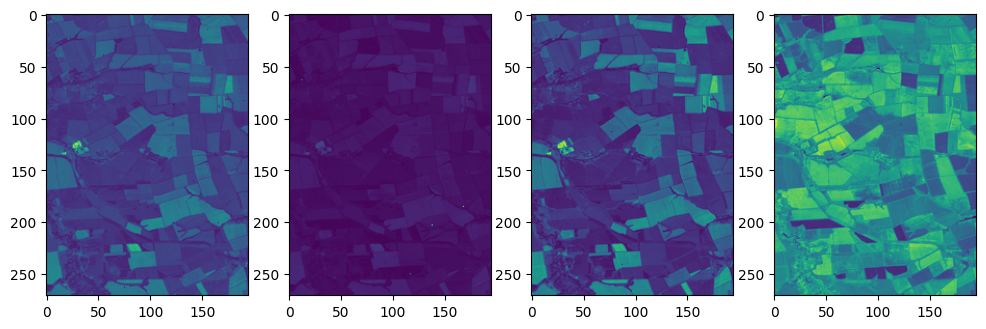

In [8]:
n_rasters = ds.RasterCount

fig, axs = plt.subplots(nrows = 1, ncols=n_rasters)
fig.set_size_inches(12, 6)

for i in range(n_rasters):
    raster = ds.GetRasterBand(i+1)
    img_arr = raster.ReadAsArray()
    ax = axs[i] 
    ax.imshow(img_arr) 

Посмотрим подложки

In [9]:
low_layer = gdal.Open('./layouts/layout_2022-03-17.tif', gdal.GA_ReadOnly)
print("Количество растров: ", low_layer.RasterCount)
print("Количество геопривязок: ", low_layer.GetGCPCount())
print("Количество слоев: ",low_layer.GetLayerCount())

Количество растров:  4
Количество геопривязок:  0
Количество слоев:  0


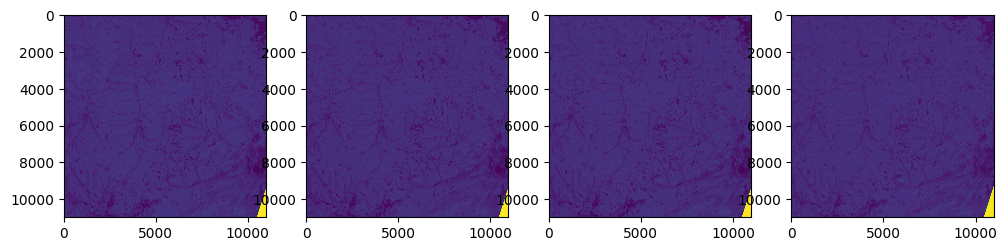

In [10]:
n_rasters = low_layer.RasterCount

fig, axs = plt.subplots(nrows = 1, ncols=n_rasters)
fig.set_size_inches(12, 6)

for i in range(n_rasters):
    raster = low_layer.GetRasterBand(i+1)
    img_arr = raster.ReadAsArray()
    ax = axs[i] 
    ax.imshow(img_arr) 

In [16]:
ds.GetGeoTransform()

(0.0, 0.1, 0.0, 0.0, 0.0, 0.1)

In [12]:
low_layer.GetGeoTransform()

(399960.0, 10.0, 0.0, 5800020.0, 0.0, -10.0)

Похоже, что нам надо найти GeoTransform для ds